# <center>Data Science and Business Analytics
## <center>Task-4 : Exploratory Data Analysis - Terrorism 
### Name : Abdul Hanan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =  pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8, 11, 12, 13, 14, 29, 35, 84, 100, 103])

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   provstate         181270 non-null  object 
 6   city              181257 non-null  object 
 7   latitude          177135 non-null  float64
 8   longitude         177134 non-null  float64
 9   attacktype1_txt   181691 non-null  object 
 10  targtype1_txt     181691 non-null  object 
 11  weapsubtype1_txt  160923 non-null  object 
 12  nkillter          114733 non-null  float64
 13  nwoundte          112548 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 15.2+ MB


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'provstate',
       'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
       'weapsubtype1_txt', 'nkillter', 'nwoundte'],
      dtype='object')

In [5]:
df = df.rename(columns={'eventid':'ID', 'iyear':'Year', 'imonth':'Month', 'iday':'Day',
             'country_txt':'Country', 'provstate':'State','city':'City', 'targtype1_txt':'Target',
             'weapsubtype1_txt': 'Weapon', 'attacktype1_txt': 'Attacktype', 'nkillter':'Fatalities', 
             'nwoundte':'Injuries'})

In [6]:
df.head()

,ID,Year,Month,Day,Country,State,City,latitude,longitude,Attacktype,Target,Weapon,Fatalities,Injuries
0,197000000001,1970,7,2,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,NaN,NaN,NaN
1,197000000002,1970,0,0,Mexico,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),NaN,NaN,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,NaN,NaN,NaN
3,197001000002,1970,1,0,Greece,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown Explosive Type,NaN,NaN
4,197001000003,1970,1,0,Japan,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          181691 non-null  int64  
 1   Year        181691 non-null  int64  
 2   Month       181691 non-null  int64  
 3   Day         181691 non-null  int64  
 4   Country     181691 non-null  object 
 5   State       181270 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Target      181691 non-null  object 
 11  Weapon      160923 non-null  object 
 12  Fatalities  114733 non-null  float64
 13  Injuries    112548 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 15.2+ MB


In [8]:
df.corr()

,ID,Year,Month,Day,latitude,longitude,Fatalities,Injuries
ID,1.000000,0.999996,0.002706,0.018336,0.166886,0.003907,0.027579,0.027904
Year,0.999996,1.000000,0.000139,0.018254,0.166933,0.003917,0.027563,0.027879
Month,0.002706,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003462,0.005091
Day,0.018336,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.002012,0.001812
latitude,0.166886,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.003282,0.021855
longitude,0.003907,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.004713,0.020186
Fatalities,0.027579,0.027563,0.003462,-0.002012,-0.003282,-0.004713,1.000000,0.594125
Injuries,0.027904,0.027879,0.005091,0.001812,0.021855,0.020186,0.594125,1.000000


<AxesSubplot:>

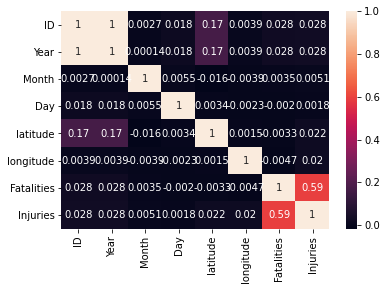

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
pd.DataFrame(df.isnull().sum(),columns = ['Number of missing values'])

,Number of missing values
ID,0
Year,0
Month,0
Day,0
Country,0
State,421
City,434
latitude,4556
longitude,4557
Attacktype,0


In [11]:
df = df[df['longitude'].notna()]
df.shape

(177134, 14)

In [12]:
pd.DataFrame(df.isnull().sum(),columns = ['Number of missing values'])

,Number of missing values
ID,0
Year,0
Month,0
Day,0
Country,0
State,409
City,426
latitude,0
longitude,0
Attacktype,0


In [13]:
clean_lats = df['latitude']
clean_lons = df['longitude']
lats = clean_lats.tolist()
lons = clean_lons.tolist()


In [14]:
a = df[['ID','Year']]
#print(a)
a.groupby('Year').first()

,ID
Year,
1970,197000000001
1971,197101010001
1972,197200000001
1973,197301010001
1974,197400000001
1975,197500000001
1976,197600000001
1977,197700000001
1978,197800000001


In [15]:
b = df[['Country','State','City']]
y = b['Country'].value_counts().reset_index()
y[:20]

,index,Country
0,Iraq,24487
1,Pakistan,14318
2,Afghanistan,12639
3,India,11801
4,Colombia,7835
5,Philippines,6528
6,Peru,5808
7,United Kingdom,5227
8,El Salvador,4846
9,Turkey,4126


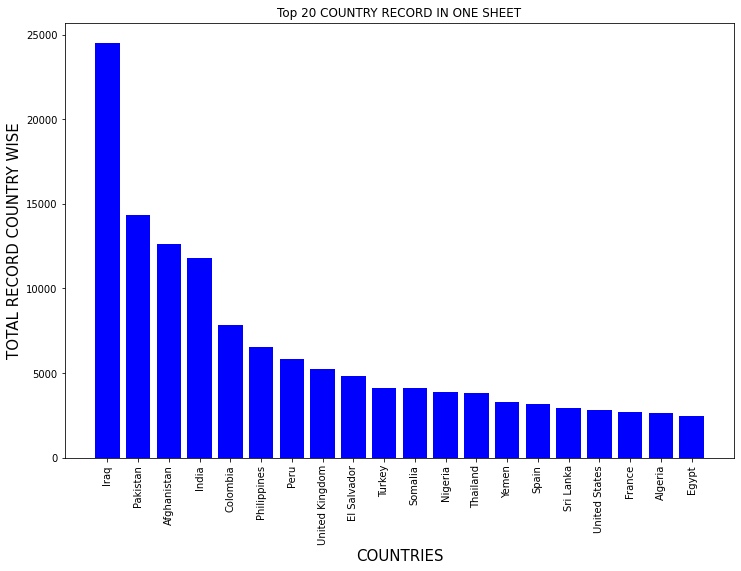

In [16]:
plt.figure(figsize=(12,8))
x = y['index'][:20]
y = y['Country'][:20]
plt.title('Top 20 COUNTRY RECORD IN ONE SHEET')
plt.xlabel('COUNTRIES',fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('TOTAL RECORD COUNTRY WISE', fontsize = 15)
plt.bar(x,y,color = 'blue')
plt.show()

In [17]:
z = b['State'].value_counts().reset_index()
z[:20]

,index,State
0,Baghdad,7645
1,Northern Ireland,4497
2,Balochistan,3710
3,Saladin,3411
4,Al Anbar,3299
5,Nineveh,3241
6,Sindh,3205
7,Khyber Pakhtunkhwa,3084
8,Diyala,3041
9,Lima,2615


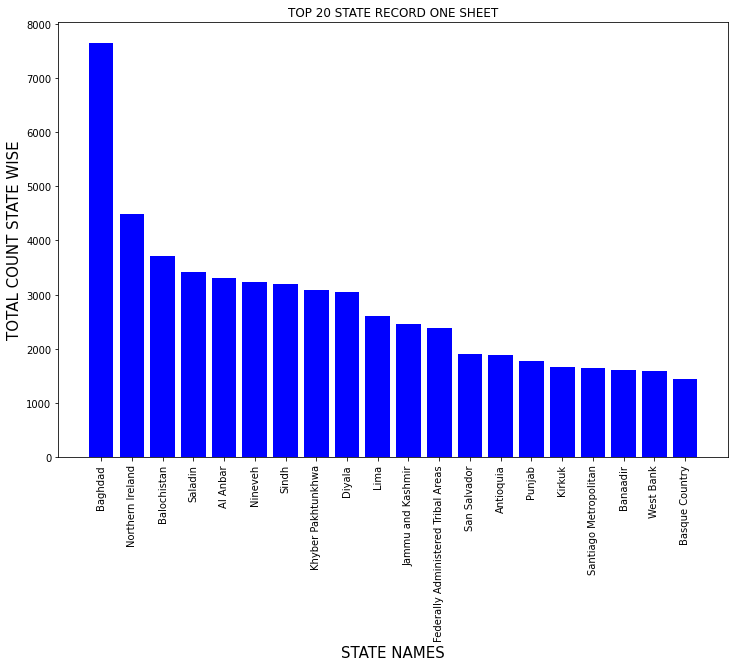

In [18]:
plt.figure(figsize=(12,8))
x = z['index'][:20]
y = z['State'][:20]
plt.xlabel('STATE NAMES',fontsize =15)
plt.ylabel('TOTAL COUNT STATE WISE',fontsize = 15)
plt.title('TOP 20 STATE RECORD ONE SHEET')
plt.xticks(rotation = 90)
plt.bar(x,y,color = 'blue')
plt.show()

In [19]:
c = df[['Year','Fatalities','Injuries']]
d = c.groupby(['Year']).sum().reset_index()
d

,Year,Fatalities,Injuries
0,1970,15.0,1.0
1,1971,4.0,0.0
2,1972,18.0,2.0
3,1973,21.0,1.0
4,1974,22.0,7.0
5,1975,106.0,4.0
6,1976,16.0,3.0
7,1977,20.0,3.0
8,1978,34.0,6.0
9,1979,95.0,9.0


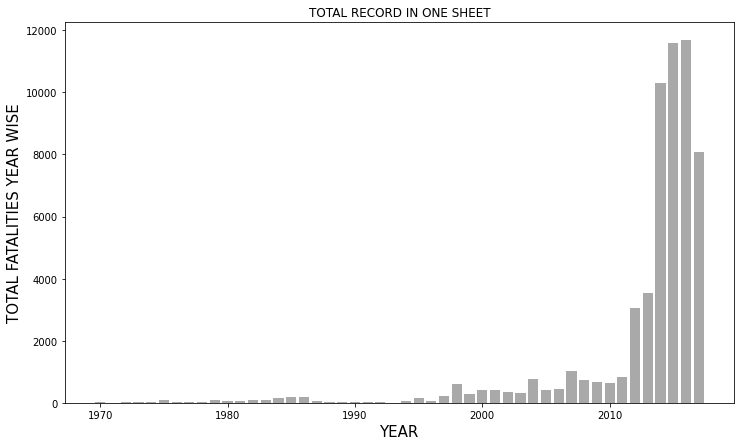

In [21]:
plt.figure(figsize=(12,7))
x = d['Year']
y = d['Fatalities']
plt.title("TOTAL RECORD IN ONE SHEET")
plt.xlabel('YEAR',fontsize = 15)
plt.ylabel('TOTAL FATALITIES YEAR WISE',fontsize =15)
plt.bar(x,y,color = 'darkgray')
plt.show()

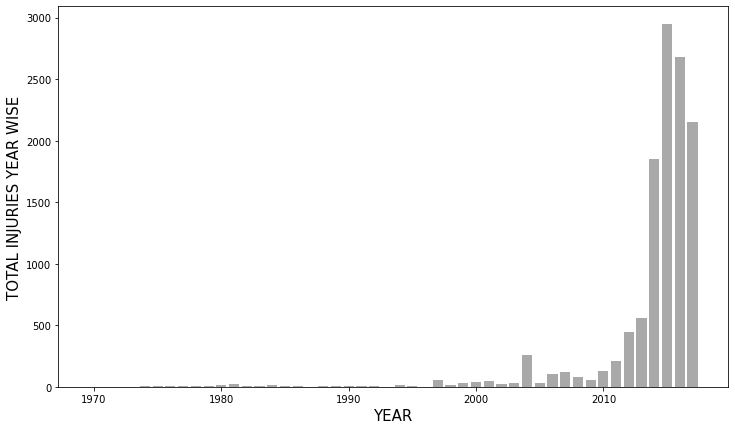

In [22]:
plt.figure(figsize=(12,7))
x = d['Year']
y = d['Injuries']
plt.xlabel('YEAR',fontsize = 15)
plt.ylabel('TOTAL INJURIES YEAR WISE',fontsize = 15 )
plt.bar(x,y,color = 'darkgray')
plt.show()

In [24]:
e = df[['Year','Attacktype','Target']]
x = e['Year'].value_counts().reset_index()
x

,index,Year
0,2014,16794
1,2015,14861
2,2016,13530
3,2013,11926
4,2017,10853
5,2012,8470
6,2011,5048
7,1992,4832
8,2010,4818
9,2008,4756


Text(0, 0.5, 'TOTAL ATTACK ENTERYS')

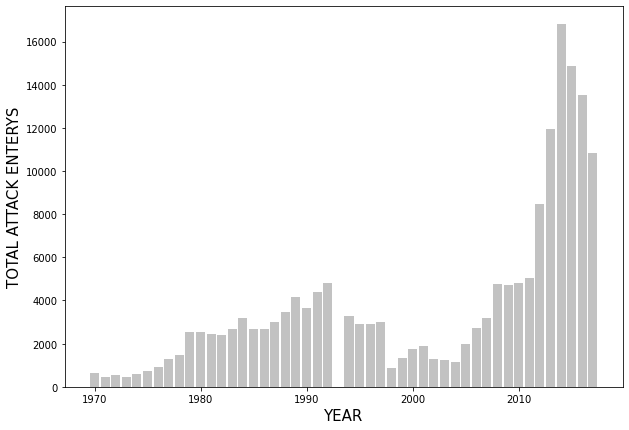

In [25]:
plt.figure(figsize = (10,7))
y = x['Year']
x = x['index']
plt.bar(x, y, width=0.85, alpha = 0.7, color = 'darkgrey', ecolor = 'black')
plt.xlabel('YEAR',fontsize = 15)
plt.ylabel('TOTAL ATTACK ENTERYS', fontsize = 15)


In [26]:
f = df[['Attacktype','Target']]
g = f['Target'].value_counts().reset_index()
g

,index,Target
0,Private Citizens & Property,42568
1,Military,26893
2,Police,24140
3,Government (General),20809
4,Business,20274
5,Transportation,6550
6,Unknown,5831
7,Utilities,5552
8,Religious Figures/Institutions,4382
9,Educational Institution,4269


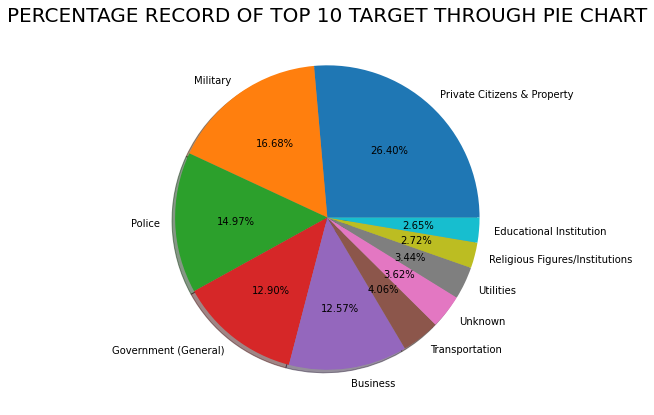

In [27]:
plt.figure(figsize = (12,7))
plt.pie(g['Target'][:10],labels=g['index'][:10],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title('PERCENTAGE RECORD OF TOP 10 TARGET THROUGH PIE CHART',fontsize = 20)
plt.show()

In [28]:
h = f['Attacktype'].value_counts().reset_index()
h

,index,Attacktype
0,Bombing/Explosion,86843
1,Armed Assault,41107
2,Assassination,18819
3,Hostage Taking (Kidnapping),10671
4,Facility/Infrastructure Attack,10186
5,Unknown,6931
6,Unarmed Assault,986
7,Hostage Taking (Barricade Incident),962
8,Hijacking,629


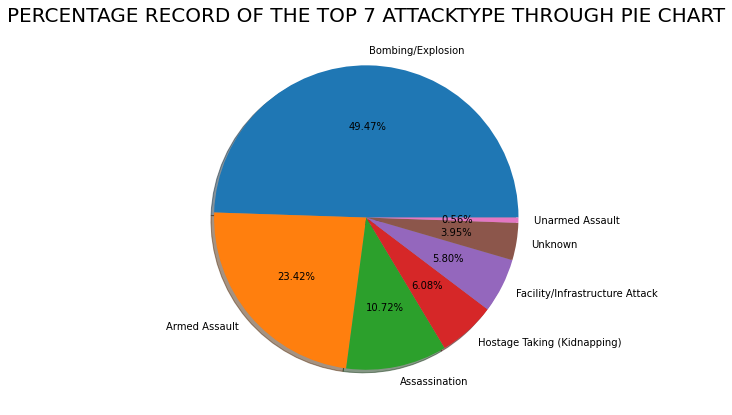

In [29]:
plt.figure(figsize=(12,7))
plt.pie(h['Attacktype'][:7],labels=h['index'][:7],autopct='%0.2f%%',shadow=True)
plt.title('PERCENTAGE RECORD OF THE TOP 7 ATTACKTYPE THROUGH PIE CHART',fontsize =20)
plt.show()

In [30]:
k = df['Weapon'].value_counts().reset_index()
k

,index,Weapon
0,Unknown Explosive Type,44001
1,Unknown Gun Type,32725
2,Automatic or Semi-Automatic Rifle,16026
3,Vehicle,9852
4,"Projectile (rockets, mortars, RPGs, etc.)",9725
5,Other Explosive Type,7282
6,Handgun,6565
7,Grenade,5112
8,Landmine,4122
9,Arson/Fire,4104


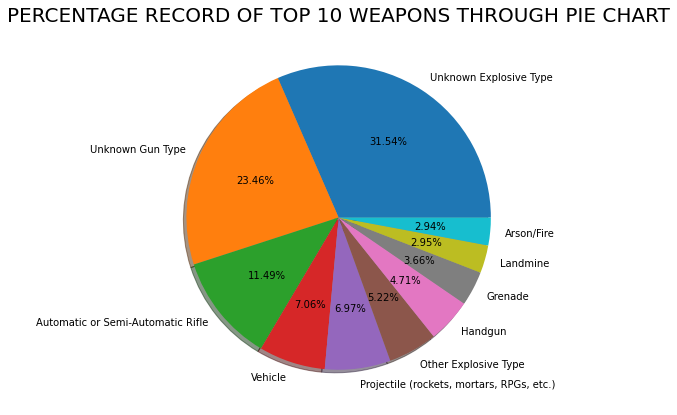

In [31]:
plt.figure(figsize=(12,7))
plt.pie(k['Weapon'][:10],labels=k['index'][:10],autopct='%0.2f%%',shadow = True)
plt.title('PERCENTAGE RECORD OF TOP 10 WEAPONS THROUGH PIE CHART',fontsize = 20)
plt.show()